<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/curremt_version_movie_review_layer_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
  import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [269]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
# from google.colab import files

# uploaded = files.upload()

# import zipfile
# import io
# zf = zipfile.ZipFile(io.BytesIO(uploaded['movie_review.zip']), "r")
# zf.extractall()

review_data = load_files(r"movie_review")
X, y = review_data.data, review_data.target

documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [270]:
print(documents)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [271]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer(max_features=40000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
# vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents).toarray()
print(X)

vector_size = 885

# tfidfconverter = TfidfTransformer()
# print(tfidfconverter)
# X = tfidfconverter.fit_transform(X).toarray()
# print(X)

X_train_tmp, X_test_tmp, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# print(X_train.shape)

X_pos_sum = np.zeros(12638)
X_neg_sum = np.zeros(12638)

X_train = np.zeros((1401, 884))
X_test = np.zeros((601, 884))

for i in range(0, 2002):
  if y[i] == 0:
    X_neg_sum = X_neg_sum + X[i]
  else:
    X_pos_sum = X_pos_sum + X[i]

pos_neg_voca = 0

for i in range(0, 12638):
  # if abs(X_neg_sum[i] - X_pos_sum[i]) >= 30:
  if (X_neg_sum[i]*3 <= X_pos_sum[i] and X_neg_sum[i] > 2) or (X_pos_sum[i]*3 <= X_neg_sum[i] and X_pos_sum[i] > 2):
    for j in range(0, 1401):
      X_train[j][pos_neg_voca] = X_train_tmp[j][i]
    for j in range(0, 601):
      X_test[j][pos_neg_voca] = X_test_tmp[j][i]
    pos_neg_voca  = pos_neg_voca + 1

print(X_neg_sum)
print(X_pos_sum)
print(pos_neg_voca)

print(X_train)
print(X_test)

print(X_train[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[ 7. 60.  4. ...  3.  8.  5.]
[ 2. 55.  6. ...  7.  6. 12.]
884
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [272]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 1 ... 1 0 1]
[1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0
 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0
 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1
 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0
 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0
 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1

In [273]:
#train_classifier에 대한 함수 정의하기
# def train_classifier(X_Train, y_Train):


In [274]:
# #Codes for classification

# classifier = train_classifier(X_train, y_train)
# y_pred_test = classifier.predict(X_test)
# y_pred_train = classifier.predict(X_train)

In [275]:
matrix_t = np.zeros((350, vector_size))  #350줄
matrix_t[0][0] = 1               #y레이어의 bias를 위한 값 1

for i in range(1, 350):
  for j in range(0, vector_size):
    matrix_t[i][j] = np.random.normal()


# matrix_u[196][0] = 0            #줄, 칸
##############################################
matrix_u = np.zeros((50, 350))  #50줄
matrix_u[0][0] = 1               #y레이어의 bias를 위한 값 1

for i in range(1, 50):
  for j in range(0, 350):
    matrix_u[i][j] = np.random.normal()


# matrix_u[196][0] = 0            #줄, 칸
##############################################
matrix_v = np.zeros((8, 50))  #8줄
matrix_v[0][0] = 1               #y레이어의 bias를 위한 값 1

for i in range(1, 8):
  for j in range(0, 50):
    matrix_v[i][j] = np.random.normal()


# matrix_v[196][0] = 0            #줄, 칸
##############################################
matrix_w = np.zeros((1, 8))  #1줄

for i in range(0, 1):
  for j in range(0, 8):
    matrix_w[i][j] = np.random.normal()

# matrix_w[196][0] = 0            #줄, 칸

# print(matrix)

matrix_t=np.random.normal(0, 0.1,(349,len(X_train[0])+1)) #bias 포함
# matrix_t[0] = 0
# matrix_t[0][0] = 1
matrix_u=np.random.normal(0, 0.1,(49,350))
# matrix_u[0] = 0
# matrix_u[0][0] = 1
matrix_v=np.random.normal(0, 0.1,(7,50))
# matrix_v[0] = 0
# matrix_v[0][0] = 1
matrix_w=np.random.normal(0, 0.1,(8))[np.newaxis]

In [276]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.animation as animation
import operator
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_regression 
import csv
import math
import statistics

In [277]:
import operator

train_x=X_train
test_x=X_test
train_l=y_train
test_l=y_test

train_x=np.transpose(train_x)
test_x=np.transpose(test_x)

train_bias=np.ones((len(train_x[0])), dtype=float)
test_bias=np.ones(len((test_x[0])), dtype=float)

train_x=np.insert(train_x,0,train_bias,axis=0)
test_x=np.insert(test_x,0,test_bias,axis=0)

x_ = np.ones((350, 1))
y_ = np.ones((50, 1))

j_list = np.ones(shape=(1401, vector_size, 1))
x_list = np.ones(shape=(1401, 350, 1))

x__list = np.ones(shape=(1401, 350, 1))
y__list = np.ones(shape=(1401, 50, 1))
z__list = np.ones(shape=(1401, 8, 1))
h__list = np.ones(shape=(1401, 1, 1))

x_list = np.ones(shape=(1401, 350, 1))
y_list = np.ones(shape=(1401, 50, 1))
z_list = np.ones(shape=(1401, 8, 1))
h_list = np.ones(shape=(1401, 1, 1))
l_list = np.zeros(shape=(1401, 1, 1))

x_list_tmp = np.ones(shape=(1401, 350, 1))
y_list_tmp = np.ones(shape=(1401, 50, 1))
z_list_tmp = np.ones(shape=(1401, 8, 1))
h_list_tmp = np.ones(shape=(1401, 1, 1))

x__list_tmp = np.ones(shape=(1401, 350, 1))
y__list_tmp = np.ones(shape=(1401, 50, 1))
z__list_tmp = np.ones(shape=(1401, 8, 1))
h__list_tmp = np.ones(shape=(1401, 1, 1))

x_list = np.zeros((350, len(train_x[0])), dtype=float)
y_list = np.zeros((50,len(train_x[0])), dtype=float)
z_list = np.zeros((8,len(train_x[0])), dtype=float)
h_list = np.zeros((1, len(train_x[0])), dtype=float)

x_list2 = np.zeros((350, len(test_x[0])), dtype=float)
y_list2 = np.zeros((50,len(test_x[0])), dtype=float)
z_list2 = np.zeros((8,len(test_x[0])), dtype=float)
h_list2 = (np.zeros((len(test_x[0])), dtype=float))[np.newaxis]

for i in range(0,1401):
  x_list[0][i]=1
  y_list[0][i]=1

for i in range(0,601):
  x_list2[0][i]=1
  y_list2[0][i]=1


#training set 1401개에 대해서
# for i in range(0, 1401):  
#   bias   = [1]       #bias 1
#   im_vector = np.concatenate((bias, X_train[i]), axis = None)
#   j_list[i] = im_vector.reshape((vector_size, 1))

#   x_ = np.dot(matrix_t, j_list[i])  #x와 가중치 u를 곱해서 y_를 만듦
#   x__list[i] = x_
  
#   x_vector = np.ones((350,1)) #bias
#   for j in range (1, 350):
#     x_vector[j][0] = 1 / (1 + math.exp(-x_[j][0]))
#     # sigmoid(y_[j][0])  #sigmoid 함수를 적용해서 y_에서 y를 만듦

#   x   = x_vector.reshape((350, 1))
#   x_list[i] = x



#   y_ = np.dot(matrix_u, x)  #x와 가중치 u를 곱해서 y_를 만듦
#   y__list[i] = y_
  
#   y_vector = np.ones((50,1)) #bias
#   for j in range (1, 50):
#     y_vector[j][0] = 1 / (1 + math.exp(-y_[j][0]))
#     # sigmoid(y_[j][0])  #sigmoid 함수를 적용해서 y_에서 y를 만듦

#   y   = y_vector.reshape((50, 1))
#   y_list[i] = y

#   z_  = np.dot(matrix_v, y)  #y와 가중치 v를 곱해서 z_를 만듦
#   z__list[i] = z_
#   z_vector = np.ones((8,1)) #bias
#   for j in range (1, 8):
#     z_vector[j][0] = 1 / (1 + math.exp(-z_[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦

#   z   = z_vector.reshape((8, 1))
#   z_list[i] = z
  
#   # print(z)

#   h_  = np.dot(matrix_w, z)  #z와 가중치 w를 곱해서 h_를 만듦
#   h__list[i] = h_
  
#   h_vector = np.ones((1,1)) #bias
#   for j in range (0, 1):
#     h_vector[j][0] = 1 / (1 + math.exp(-h_[j][0]))  #sigmoid 함수를 적용해서 h_에서 h를 만듦

#   h   = h_vector.reshape((1, 1))
#   # tmp = h.ravel()
#   # max_value = max(tmp)
#   # print(max_value)
#   # max_index = tmp.index(max_value)
#   h_list[i] = h

#   tmp_label = 0
#   # print(h)

#   if h >= 0.5:
#     tmp_label = 1

#   l_list[i][0] = tmp_label
#   # print(l_list[i])
#   # print(h)

#   x_list_tmp[i] = x_list[i]
#   y_list_tmp[i] = y_list[i]
#   z_list_tmp[i] = z_list[i]
#   h_list_tmp[i] = h_list[i]
#   x__list_tmp[i] = x__list[i]
#   y__list_tmp[i] = y__list[i]
#   z__list_tmp[i] = z__list[i]
#   h__list_tmp[i] = h__list[i]
x__list = np.dot(matrix_t,train_x)
x__list2 = np.dot(matrix_t,test_x)

for a in range(1,350):
  for b in range(0,len(train_x[0])):
    x_list[a][b]=1 / (1 + math.exp(-x__list[a-1][b]))

for a in range(1,350):
  for b in range(0,len(test_x[0])):
    x_list2[a][b]=1 / (1 + math.exp(-x__list2[a-1][b]))

y__list=np.dot(matrix_u,x_list)
y__list2=np.dot(matrix_u,x_list2)

for a in range(1,50):
  for b in range(0,len(train_x[0])):
    y_list[a][b]=1 / (1 + math.exp(-y__list[a-1][b]))

for a in range(1,50):
  for b in range(0,len(test_x[0])):
    y_list2[a][b]=1 / (1 + math.exp(-y__list2[a-1][b]))
  
z__list=np.dot(matrix_v,y_list)
z__list2=np.dot(matrix_v,y_list2)

for a in range(1,8):
  for b in range(0,len(train_x[0])):
    z_list[a][b]=1 / (1 + math.exp(-z__list[a-1][b]))

for a in range(1,8):
  for b in range(0,len(test_x[0])):
    z_list2[a][b]=1 / (1 + math.exp(-z__list2[a-1][b]))

h__list=np.dot(matrix_w,z_list)
h__list2=np.dot(matrix_w,z_list2)

for b in range(0,len(train_x[0])):
  h_list[0][b]=1/(1 + math.exp(-h__list[0][b]))
  
for b in range(0,len(test_x[0])):
  h_list2[0][b]=1/(1 + math.exp(-h__list2[0][b]))

for i in range(0, 1401) :
  tmp_label = 0
  if h_list[0][i] >= 0.5 :
    tmp_label = 1

  l_list[i][0] = tmp_label

for i in range(0, 601) :
  tmp_label = 0
  if h_list2[0][i] >= 0.5 :
    tmp_label = 1

  l_list2[i][0] = tmp_label

# print(l_list)

In [278]:
import operator

# x_2 = np.ones((350, 1))
# y_2 = np.ones((50, 1))

# j_list2 = np.ones(shape=(601, vector_size, 1))
# x_list2 = np.ones(shape=(601, 350, 1))

# x__list2 = np.ones(shape=(601, 350, 1))
# y__list2 = np.ones(shape=(601, 50, 1))
# z__list2 = np.ones(shape=(601, 8, 1))
# h__list2 = np.ones(shape=(601, 1, 1))

# x_list2 = np.ones(shape=(601, 350, 1))
# y_list2 = np.ones(shape=(601, 50, 1))
# z_list2 = np.ones(shape=(601, 8, 1))
# h_list2 = np.ones(shape=(601, 1, 1))
# l_list2 = np.zeros(shape=(601, 1, 1))

# x_list_tmp2 = np.ones(shape=(601, 350, 1))
# y_list_tmp2 = np.ones(shape=(601, 50, 1))
# z_list_tmp2 = np.ones(shape=(601, 8, 1))
# h_list_tmp2 = np.ones(shape=(601, 1, 1))

# x__list_tmp2 = np.ones(shape=(601, 350, 1))
# y__list_tmp2 = np.ones(shape=(601, 50, 1))
# z__list_tmp2 = np.ones(shape=(601, 8, 1))
# h__list_tmp2 = np.ones(shape=(601, 1, 1))


#training set 1401개에 대해서
# for i in range(0, 601):  
#   bias2   = [1]       #bias 1
#   im_vector2 = np.concatenate((bias2, X_test[i]), axis = None)
#   j_list2[i] = im_vector2.reshape((vector_size, 1))

#   x_2 = np.dot(matrix_t, j_list2[i])  #x와 가중치 u를 곱해서 y_를 만듦
#   x__list2[i] = x_2
  
#   x_vector2 = np.ones((350,1)) #bias
#   for j in range (1, 350):
#     x_vector2[j][0] = 1 / (1 + math.exp(-x_2[j][0]))
#     # sigmoid(y_[j][0])  #sigmoid 함수를 적용해서 y_에서 y를 만듦

#   x2   = x_vector2.reshape((350, 1))
#   x_list2[i] = x2



#   y_2 = np.dot(matrix_u, x2)  #x와 가중치 u를 곱해서 y_를 만듦
#   y__list2[i] = y_2
  
#   y_vector2 = np.ones((50,1)) #bias
#   for j in range (1, 50):
#     y_vector2[j][0] = 1 / (1 + math.exp(-y_2[j][0]))
#     # sigmoid(y_[j][0])  #sigmoid 함수를 적용해서 y_에서 y를 만듦

#   y2   = y_vector2.reshape((50, 1))
#   y_list2[i] = y2

#   z_2  = np.dot(matrix_v, y2)  #y와 가중치 v를 곱해서 z_를 만듦
#   z__list2[i] = z_2
#   z_vector2 = np.ones((8,1)) #bias
#   for j in range (1, 8):
#     z_vector2[j][0] = 1 / (1 + math.exp(-z_2[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦

#   z2   = z_vector2.reshape((8, 1))
#   z_list2[i] = z2
  
#   # print(z)

#   h_2 = np.dot(matrix_w, z2)  #z와 가중치 w를 곱해서 h_를 만듦
#   h__list2[i] = h_2
  
#   h_vector2 = np.ones((1,1)) #bias
#   for j in range (0, 1):
#     h_vector2[j][0] = 1 / (1 + math.exp(-h_2[j][0]))  #sigmoid 함수를 적용해서 h_에서 h를 만듦

#   h2   = h_vector2.reshape((1, 1))
#   # tmp = h.ravel()
#   # max_value = max(tmp)
#   # print(max_value)
#   # max_index = tmp.index(max_value)
#   h_list2[i] = h2

#   tmp_label = 0

#   if h2 >= 0.5:
#     tmp_label = 1

#   l_list2[i][0] = tmp_label
#   # print(l_list[i])
#   # print(h2)

#   x_list_tmp2[i] = x_list2[i]
#   y_list_tmp2[i] = y_list2[i]
#   z_list_tmp2[i] = z_list2[i]
#   h_list_tmp2[i] = h_list2[i]
#   x__list_tmp2[i] = x__list2[i]
#   y__list_tmp2[i] = y__list2[i]
#   z__list_tmp2[i] = z__list2[i]
#   h__list_tmp2[i] = h__list2[i]

# print(l_list)


In [279]:
for i in range(0,1401):
  x_list[0][i]=1
  y_list[0][i]=1

for i in range(0,601):
  x_list2[0][i]=1
  y_list2[0][i]=1

In [280]:
# (1401, 1500)
# (601, 1500)
# (1401,)
# (601,)

iteration = 1000
l_r = 0.4
lambda_ = 100


cost_history = np.zeros(iteration)    #about train
cost_history2 = np.zeros(iteration)   #about test

label_group = np.zeros(shape = (1401, 1))
label_group2 = np.zeros(shape = (601, 1))

accuracy_history = np.zeros(iteration)
accuracy_history2 = np.zeros(iteration)

for i in range(0, 1401):
  label_group[i][0] = l_list[i][0]

for i in range(0, 601):
  label_group2[i][0] = l_list2[i][0]

for t in range(0, iteration):
  h_s_t=np.transpose(h_list)
  z_s_t=np.transpose(z_list[1:,:])
  y_s_t=np.transpose(y_list[1:,:])
  x_s_t=np.transpose(x_list[1:,:])
  t_s_t=np.transpose(train_x[1:,:])

  # h_s_t=h_list[:,:,:].reshape((1401, 1))
  # z_s_t=z_list[:,1:,:].reshape((1401, 7))
  # y_s_t=y_list[:,1:,:].reshape((1401, 49))
  # x_s_t=x_list[:,1:,:].reshape((1401, 349))
  # t_s_t=np.transpose(train_x[:,:])
  # print(t_s_t.shape)

  w_t=matrix_w[:,1:]
  v_t=matrix_v[:,1:]
  u_t=matrix_u[:,1:]
  t_t=matrix_t[:,1:]
  # print(t_t.shape)
  
  one_z=np.transpose(np.ones((7), dtype=float))
  one_y=np.transpose(np.ones((49), dtype=float))
  one_x=np.transpose(np.ones((349), dtype=float))

  delta5=np.transpose((np.zeros((7), dtype=float)))
  delta4=np.zeros((49,7), dtype=float)
  delta3=np.zeros((349,49), dtype=float)
  delta2=np.zeros((len(train_x)-1,349), dtype=float)

  J_sum = 0
  theta_sum = 0
  Jt_sum=0

  number_of_correct = 0
  number_of_correct2 = 0

  # print(t, end=' ')

  parameter_sum = 0

  # for q in range(0, vector_size):
  #   for w in range(1, 350):
  #     parameter_sum = parameter_sum + matrix_t[w][q]**2

  # for q in range(0, 350):
  #   for w in range(1, 50):
  #     parameter_sum = parameter_sum + matrix_u[w][q]**2

  # for q in range(0, 50):
  #   for w in range(1, 8):
  #     parameter_sum = parameter_sum + matrix_v[w][q]**2

  # for q in range(0, 8):
  #   for w in range(0, 1):
  #     parameter_sum = parameter_sum + matrix_w[w][q]**2

  # result = 0.0
  # for i in range(0, 1401):
  #   for k in range(0, 1):
  #     result = result + ((-1)*label_group[i][k]*math.log(h_list[i][k][0]) - (1-label_group[i][k])*math.log(1-h_list[i][k][0])) + ((lambda_)/(2 * 543258)) * parameter_sum
  # result = result / 1401
  # cost_history[t] = result

  for i in range(0,len(train_x[0])):
    lable=train_l[i]
    temp5=h_s_t[i]-train_l[i]
    temp4=np.multiply( np.dot( np.transpose(w_t ) , temp5 ) ,np.transpose(np.multiply(z_s_t[i] , one_z - z_s_t[i])))
    temp3=np.multiply( np.dot( np.transpose(v_t) , temp4) , np.transpose(np.multiply(y_s_t[i] , one_y - y_s_t[i])))
    temp2=np.multiply( np.dot( np.transpose( u_t ) , temp3) , np.transpose(np.multiply(x_s_t[i] , one_x - x_s_t[i])))

    delta5=delta5+ np.dot( np.transpose(z_s_t[i][np.newaxis]),temp5[np.newaxis])
    delta4=delta4 + np.dot( np.transpose(y_s_t[i][np.newaxis]), temp4[np.newaxis])
    delta3=delta3+ np.dot( np.transpose(x_s_t[i][np.newaxis]), temp3[np.newaxis] )
    delta2=delta2+ np.dot(np.transpose(t_s_t[i][np.newaxis]), temp2[np.newaxis])

    J_sum=J_sum+(-train_l[i]*math.log(h_list[0][i])-(1-train_l[i])*math.log(1-h_list[0][i]))

    if i < len(test_x[0]):
      Jt_sum=Jt_sum+(-test_l[i]*math.log(h_list2[0][i])-(1-test_l[i])*math.log(1-h_list2[0][i]))

  u2=np.multiply(u_t,u_t)
  v2=np.multiply(v_t,v_t)
  w2=np.multiply(w_t,w_t)
  t2=np.multiply(t_t,t_t)
  theta_sum=np.sum(t2)+np.sum(u2)+np.sum(v2)+np.sum(w2)

  delta5=delta5/len(train_x[0])+lambda_*np.transpose(w_t)/(7+7*49+49*349+349*(len(train_x)-1))
  delta4=delta4/len(train_x[0])+lambda_*np.transpose(v_t)/(7+7*49+49*349+349*(len(train_x)-1))
  delta3=delta3/len(train_x[0])+lambda_*np.transpose(u_t)/(7+7*49+49*349+349*(len(train_x)-1))
  delta2=delta2/len(train_x[0])+lambda_*np.transpose(t_t)/(7+7*49+49*349+349*(len(train_x)-1))

  J_sum=J_sum/len(train_x[0])+lambda_*theta_sum/(2*(7+7*49+49*349+349*(len(train_x)-1)))
  Jt_sum=Jt_sum/len(test_x[0])+lambda_*theta_sum/(2*(7+7*49+49*349+349*(len(train_x)-1)))


  cost_history[t] = J_sum
  cost_history2[t] = Jt_sum


##gradient descent
  result_w = 0
  result_v = 0
  result_u = 0
  result_t = 0

  # for i in range(0, 1401):
  #   small_delta_2 = np.zeros(shape = (1, 1))
  #   for j in range(0, 1):
  #     small_delta_2[j][0] = h_list[i][j] - label_group[i][j]
  #   # print(h_list[i])
  #   # print(label_group[i])
  #   # small_delta_2 = h_list[i] - label_group[i] #여기 label_group 다시 봐야함.
  #   small_delta_1 = np.dot(np.transpose(matrix_w), small_delta_2)
  #   small_delta_0 = np.dot(np.transpose(matrix_v), small_delta_1)*(y_list_tmp[i]*(1 - y_list_tmp[i]))
  #   small_delta_ = np.dot(np.transpose(matrix_u), small_delta_0)*(x_list_tmp[i]*(1 - x_list_tmp[i])) #이거..괜찮은가..?

  #   # print(small_delta_2)
  #   result_w = result_w + np.dot(small_delta_2, np.transpose(z_list[i]))
  #   result_v = result_v + np.dot(small_delta_1, np.transpose(y_list[i]))
  #   result_u = result_u + np.dot(small_delta_0, np.transpose(x_list[i]))
  #   result_t = result_t + np.dot(small_delta_, np.transpose(j_list[i]))

  for a in range(0, 349):
    for b in range(1,len(train_x)):
      if a<1 and b<8:
        matrix_w[a][b]=matrix_w[a][b]-l_r*(np.transpose(delta5)[a][b-1])
      if a<7 and b<50:
        matrix_v[a][b]=matrix_v[a][b]-l_r*(np.transpose(delta4)[a][b-1])
      if a<49 and b<350:
        matrix_u[a][b]=matrix_u[a][b]-l_r*np.transpose(delta3)[a][b-1]
      matrix_t[a][b]=matrix_t[a][b]-l_r*np.transpose(delta2)[a][b-1]

  # matrix_w = matrix_w - (result_w / 1401 *l_r)
  # matrix_v = matrix_v - (result_v / 1401 *l_r)
  # matrix_u = matrix_u - (result_u / 1401 *l_r)
  # matrix_t = matrix_t - (result_t / 1401 *l_r)


####################################################################

  # for k in range(0, 1401):
  #   bias   = [1]       #bias 1
  #   im_vector = np.concatenate((bias, X_train[k]), axis = None)
  #   j_list[k] = im_vector.reshape((vector_size, 1))

  #   x_ = np.dot(matrix_t, j_list[k])  #x와 가중치 u를 곱해서 y_를 만듦
  #   x__list[k] = x_
    
  #   x_vector = np.ones((350,1)) #bias
  #   for j in range (1, 350):
  #     x_vector[j][0] = 1 / (1 + math.exp(-x_[j][0]))
  #     # sigmoid(y_[j][0])  #sigmoid 함수를 적용해서 y_에서 y를 만듦

  #   x   = x_vector.reshape((350, 1))
  #   x_list[k] = x



  #   y_ = np.dot(matrix_u, x)  #x와 가중치 u를 곱해서 y_를 만듦
  #   y__list[k] = y_
    
  #   y_vector = np.ones((50,1)) #bias
  #   for j in range (1, 50):
  #     y_vector[j][0] = 1 / (1 + math.exp(-y_[j][0]))
  #     # sigmoid(y_[j][0])  #sigmoid 함수를 적용해서 y_에서 y를 만듦

  #   y   = y_vector.reshape((50, 1))
  #   y_list[k] = y

  #   z_  = np.dot(matrix_v, y)  #y와 가중치 v를 곱해서 z_를 만듦
  #   z__list[k] = z_
  #   z_vector = np.ones((8,1)) #bias
  #   for j in range (1, 8):
  #     z_vector[j][0] = 1 / (1 + math.exp(-z_[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦

  #   z   = z_vector.reshape((8, 1))
  #   z_list[k] = z
    
  #   # print(z)

  #   h_  = np.dot(matrix_w, z)  #z와 가중치 w를 곱해서 h_를 만듦
  #   h__list[k] = h_
    
  #   h_vector = np.ones((1,1)) #bias
  #   for j in range (0, 1):
  #     h_vector[j][0] = 1 / (1 + math.exp(-h_[j][0]))  #sigmoid 함수를 적용해서 h_에서 h를 만듦

  #   h   = h_vector.reshape((1, 1))
  #   # tmp = h.ravel()
  #   # max_value = max(tmp)
  #   # print(max_value)
  #   # max_index = tmp.index(max_value)

  #   h_list11_tmp = h_list.reshape((1401))
  #   median_val = statistics.median(h_list11_tmp)

  #   h_list[k] = h
########################################################
  x__list = np.dot(matrix_t,train_x)
  x__list2 = np.dot(matrix_t,test_x)

  for a in range(1,350):
    for b in range(0,len(train_x[0])):
      x_list[a][b]=1 / (1 + math.exp(-x__list[a-1][b]))

  for a in range(1,350):
    for b in range(0,len(test_x[0])):
      x_list2[a][b]=1 / (1 + math.exp(-x__list2[a-1][b]))

  y__list=np.dot(matrix_u,x_list)
  y__list2=np.dot(matrix_u,x_list2)

  for a in range(1,50):
    for b in range(0,len(train_x[0])):
       y_list[a][b]=1 / (1 + math.exp(-y__list[a-1][b]))

  for a in range(1,50):
    for b in range(0,len(test_x[0])):
      y_list2[a][b]=1 / (1 + math.exp(-y__list2[a-1][b]))
  
  z__list=np.dot(matrix_v,y_list)
  z__list2=np.dot(matrix_v,y_list2)

  for a in range(1,8):
    for b in range(0,len(train_x[0])):
      z_list[a][b]=1 / (1 + math.exp(-z__list[a-1][b]))

  for a in range(1,8):
    for b in range(0,len(test_x[0])):
      z_list2[a][b]=1 / (1 + math.exp(-z__list2[a-1][b]))

  h__list=np.dot(matrix_w,z_list)
  h__list2=np.dot(matrix_w,z_list2)

  for b in range(0,len(train_x[0])):
    h_list[0][b]=1/(1 + math.exp(-h__list[0][b]))
  
  for b in range(0,len(test_x[0])):
    h_list2[0][b]=1/(1 + math.exp(-h__list2[0][b]))

  for i in range(0, 1401) :
    tmp_label = 0
    if h_list[0][i] >= 0.5 :
      tmp_label = 1

    l_list[i][0] = tmp_label

    # tmp_label = 0

    # if h >= median_val:
    #     # print(h)
    #     tmp_label = 1

    # if h >= 0.5:
    #   # print(h)
    #   tmp_label = 1

    # l_list[k][0] = tmp_label
    # print(l_list[k])
    # print(h)

    # x_list_tmp[k] = x_list[k]
    # y_list_tmp[k] = y_list[k]
    # z_list_tmp[k] = z_list[k]
    # h_list_tmp[k] = h_list[k]
    # x__list_tmp[k] = x__list[k]
    # y__list_tmp[k] = y__list[k]
    # z__list_tmp[k] = z__list[k]
    # h__list_tmp[k] = h__list[k]

    if l_list[i][0] == y_train[i]:
      number_of_correct = number_of_correct + 1

  accuracy_history[t] = number_of_correct / 1401 * 100
  # print(accuracy_history[t])
  # accuracy_history[t] = number_of_correct_predictions/total_number_of_predictions*100
  # print(accuracy_history[t])

############################
  #test data!

  number_of_correct_predictions2 = 0
  
  # print(t, end=' ')

  # result2 = 0.0
  # for i in range(0, 601):
  #   for k in range(0, 1):
  #     # if h_list_tmp[i][k][0] <= 0:
  #     # print(h_list_tmp[i][k][0])
  #     result2 = result2 + ((-1)*label_group2[i][k]*math.log(h_list2[i][k][0]) - (1-label_group2[i][k])*math.log(1-h_list2[i][k][0])) + ((lambda_)/(2 * 164995)) * parameter_sum
  # result2 = result2 / 601
  # cost_history2[t] = result2


  # for k in range(0, 601):
  # # print(i)
  #   bias2   = [1]       #bias 1
  #   im_vector2 = np.concatenate((bias2, X_test[k]), axis = None)
  #   j_list2[k] = im_vector2.reshape((vector_size, 1))

  #   x_2 = np.dot(matrix_t, j_list2[k])  #x와 가중치 u를 곱해서 y_를 만듦
  #   x__list2[k] = x_2
    
  #   x_vector2 = np.ones((350,1)) #bias
  #   for j in range (1, 350):
  #     x_vector2[j][0] = 1 / (1 + math.exp(-x_2[j][0]))
  #     # sigmoid(y_[j][0])  #sigmoid 함수를 적용해서 y_에서 y를 만듦

  #   x2   = x_vector2.reshape((350, 1))
  #   x_list2[k] = x2



  #   y_2 = np.dot(matrix_u, x2)  #x와 가중치 u를 곱해서 y_를 만듦
  #   y__list2[k] = y_2
    
  #   y_vector2 = np.ones((50,1)) #bias
  #   for j in range (1, 50):
  #     y_vector2[j][0] = 1 / (1 + math.exp(-y_2[j][0]))
  #     # sigmoid(y_[j][0])  #sigmoid 함수를 적용해서 y_에서 y를 만듦

  #   y2   = y_vector2.reshape((50, 1))
  #   y_list2[k] = y2

  #   z_2  = np.dot(matrix_v, y2)  #y와 가중치 v를 곱해서 z_를 만듦
  #   z__list2[k] = z_2
  #   z_vector2 = np.ones((8,1)) #bias
  #   for j in range (1, 8):
  #     z_vector2[j][0] = 1 / (1 + math.exp(-z_2[j][0]))  #sigmoid 함수를 적용해서 y_에서 y를 만듦

  #   z2   = z_vector2.reshape((8, 1))
  #   z_list2[k] = z2
    
  #   # print(z)

  #   h_2 = np.dot(matrix_w, z2)  #z와 가중치 w를 곱해서 h_를 만듦
  #   h__list2[k] = h_2
    
  #   h_vector2 = np.ones((1,1)) #bias
  #   for j in range (0, 1):
  #     h_vector2[j][0] = 1 / (1 + math.exp(-h_2[j][0]))  #sigmoid 함수를 적용해서 h_에서 h를 만듦

  #   h2   = h_vector2.reshape((1, 1))
  #   # tmp = h.ravel()
  #   # max_value = max(tmp)
  #   # print(max_value)
  #   # max_index = tmp.index(max_value)

  #   h_list22_tmp = h_list2.reshape((601))
  #   median_val2 = statistics.median(h_list22_tmp)

  #   h_list2[k] = h2

  #   # tmp_label = 0

  #   # if h2 >= median_val2:
  #   #   # print(h2)
  #   #   tmp_label = 1

  #   if h2 >= 0.5:
  #     # print(h2)
  #     tmp_label = 1

  #   l_list2[k][0] = tmp_label
  #   # print(l_list[k])
  #   # print(h2)

  #   x_list_tmp2[k] = x_list2[k]
  #   y_list_tmp2[k] = y_list2[k]
  #   z_list_tmp2[k] = z_list2[k]
  #   h_list_tmp2[k] = h_list2[k]
  #   x__list_tmp2[k] = x__list2[k]
  #   y__list_tmp2[k] = y__list2[k]
  #   z__list_tmp2[k] = z__list2[k]
  #   h__list_tmp2[k] = h__list2[k]

  for i in range(0, 601) :
    tmp_label = 0
    if h_list2[0][i] >= 0.5 :
      tmp_label = 1

    l_list2[i][0] = tmp_label

    if l_list2[i][0] == y_test[i]:
      number_of_correct2 = number_of_correct2 + 1

  accuracy_history2[t] = number_of_correct2 / 601 * 100
  # print(accuracy_history2[t])
  print(t,"train:::acccuracy  ",accuracy_history[t],"   J   ",J_sum,"::::: test accuracy",accuracy_history2[t],"   J   ",Jt_sum)

  # accuracy_history2[t] = number_of_correct_predictions2/total_number_of_predictions2*100
  t = t + 1

0 train:::acccuracy   49.892933618843685    J    1.2020599005470183 ::::: test accuracy 50.249584026622294    J    1.2011329351519038
1 train:::acccuracy   49.892933618843685    J    1.198996758722013 ::::: test accuracy 50.249584026622294    J    1.1982328948094674
2 train:::acccuracy   49.892933618843685    J    1.19685349582122 ::::: test accuracy 50.249584026622294    J    1.1962235792833629
3 train:::acccuracy   49.892933618843685    J    1.1953319259331971 ::::: test accuracy 50.249584026622294    J    1.1948127176412515
4 train:::acccuracy   49.892933618843685    J    1.1942356090242892 ::::: test accuracy 50.249584026622294    J    1.1938083193688767
5 train:::acccuracy   49.892933618843685    J    1.1934326996358566 ::::: test accuracy 50.249584026622294    J    1.1930819772155135
6 train:::acccuracy   49.892933618843685    J    1.1928334839733943 ::::: test accuracy 50.249584026622294    J    1.1925466909236189
7 train:::acccuracy   49.892933618843685    J    1.19237630392571

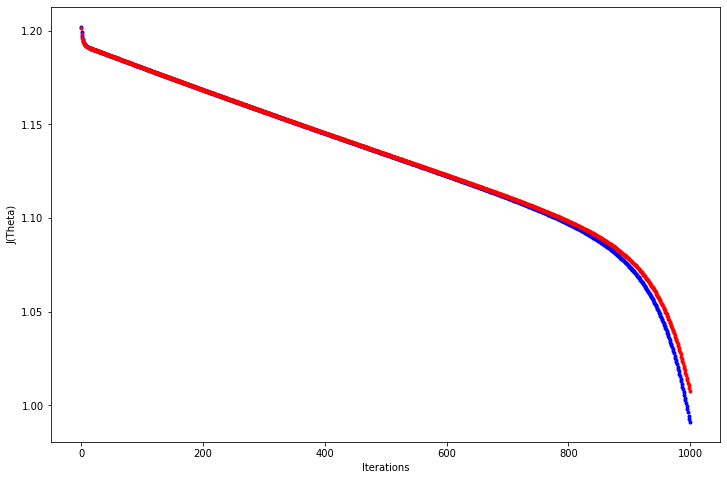

In [281]:
#그 코드를 바탕으로 training loss plotting 하기.
real_iter = iteration

fig,ax = plt.subplots(figsize=(12,8))

cost_tmp = np.zeros(real_iter)

for i in range(0, real_iter):
  cost_tmp[i] = cost_history[i]


# print(cost_history[1])

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(real_iter),cost_tmp,'b.', color = 'blue')
_=ax.plot(range(real_iter),cost_history2,'b.', color = 'red')

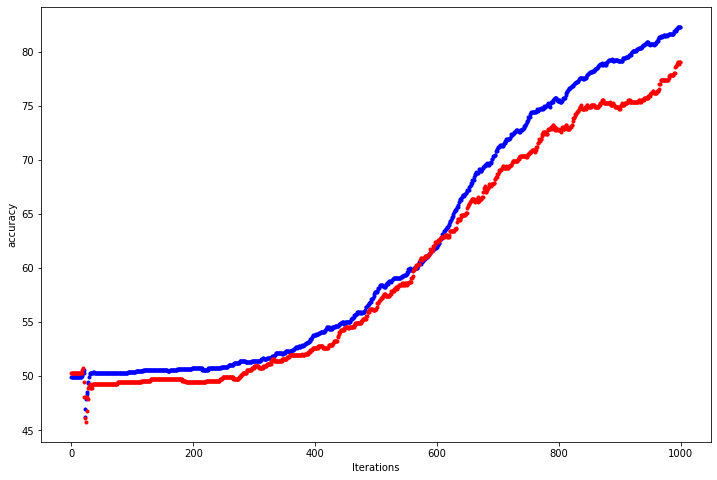

In [282]:
#그 코드를 바탕으로 training loss plotting 하기.
fig,ax = plt.subplots(figsize=(12,8))

# print(cost_history[1])

ax.set_ylabel('accuracy')
ax.set_xlabel('Iterations')
_=ax.plot(range(iteration),accuracy_history,'b.', color = 'blue')
_=ax.plot(range(iteration),accuracy_history2,'b.', color = 'red')
# print(ac_tmp)

In [283]:
#Codes for Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

l_list_tmp = l_list.reshape((1401))
l_list2_tmp = l_list2.reshape((601))

print(confusion_matrix(y_train,l_list_tmp))
print(classification_report(y_train,l_list_tmp))
print(accuracy_score(y_train, l_list_tmp))

print(confusion_matrix(y_test,l_list2_tmp))
print(classification_report(y_test,l_list2_tmp))
print(accuracy_score(y_test, l_list2_tmp))

[[601  98]
 [150 552]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       699
           1       0.85      0.79      0.82       702

    accuracy                           0.82      1401
   macro avg       0.82      0.82      0.82      1401
weighted avg       0.82      0.82      0.82      1401

0.8229835831548894
[[248  54]
 [ 72 227]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       302
           1       0.81      0.76      0.78       299

    accuracy                           0.79       601
   macro avg       0.79      0.79      0.79       601
weighted avg       0.79      0.79      0.79       601

0.7903494176372712


In [284]:
class_1 = 0

for i in range(0, 601):
  if l_list2_tmp[i] == 1:
    class_1 = class_1 + 1

print(class_1)

281


In [285]:
print(y_train)
print(l_list_tmp)

[0 0 1 ... 1 0 1]
[0. 0. 1. ... 1. 0. 1.]
